Primero importamos algunos paquetes necesarios para el análisis.

In [30]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
from scipy import stats

Se importa la base de datos.

In [2]:
#introducimos la base de datos
data = pd.read_csv('UFO_sightings.csv')
#observando la base de datos
data.head()

C:\Users\JOSEPH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,11/11/1906,wien (austria),NaN,NaN,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819
1,02/01/1910,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
2,06/01/1910,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056
3,04/05/1916,france (above; from aircraft),NaN,NaN,cigar,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,03/09/2004,46.227638,2.213749
4,06/11/1920,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,05/12/2009,40.1238889,-86.013333


In [3]:
#Observemos la informacion de la base de datos para ver que todo esta en orden
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


Hay que notar que notar donde las columnas como; state, country, shape, comments que rienen valores nulos y las columnas duracion y latitud se leen como objetos cosa que no debe pasar y podemos tomar el formato fecha para la columna date time. Procedemos a limpiar la base.

In [5]:
#Primero hacemos que se lea bien la columna de duracion en sefundos y latitud
data.iloc[:,5] = pd.to_numeric(data.iloc[:,5],errors='coerce')
data.iloc[:,9] = pd.to_numeric(data.iloc[:,9],errors='coerce')
data.iloc[:,0] = pd.to_datetime(data.iloc[:,0], format = "%d%m%Y", infer_datetime_format=True)

In [6]:
#observamos la info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80329 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80331 non-null  float64       
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.7+ MB


Ahora se lee bien todo ademas de que aparecen errores en las columnas corregidas por objetos.

In [7]:
# Procedemos a quitar algunos datos faltantes.
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
# Nos quedamos con las que NO son NA
data_clean = data[~row_has_NaN]

In [8]:
#veremos que porcentaje de renglones quitamos a la base 
total_rows = data.shape[0]
clean_rows = data_clean.shape[0]
( clean_rows*100 ) / total_rows

82.80137429666883

In [9]:
total_rows

80332

Nos quedamos con el 82% de la base original, de una base con 80 mil datos, es suficiente para hacer una analisis correcto de la base de datos. Creamos una base aparte de únicamente estos errores.

In [10]:
bad_data = data[row_has_NaN]

Nuevamente vemos la información de los datos limpios para ver que todo este en orden.

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 1 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              66516 non-null  datetime64[ns]
 1   city                  66516 non-null  object        
 2   state                 66516 non-null  object        
 3   country               66516 non-null  object        
 4   shape                 66516 non-null  object        
 5   duration (seconds)    66516 non-null  float64       
 6   duration (hours/min)  66516 non-null  object        
 7   comments              66516 non-null  object        
 8   date posted           66516 non-null  object        
 9   latitude              66516 non-null  float64       
 10  longitude             66516 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 6.1+ MB


Ahora todo esta listo para hacer analisis de la base de datos. Primero prsentamos un grafico de puntos
viendo la distribucion de la duracion respecto al tiempo.

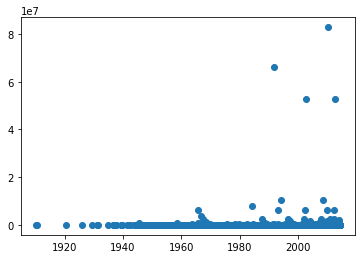

In [27]:
#Aqui se puede apreciar un grafico de la fecha vs la duracion
plt.scatter(data_clean.iloc[:,0],data_clean.iloc[:,5])

Este gráfico es informativo en el sentido de que la mayoria de la informacion esta centrada en tiempos chicos asi que para evitar el sesgo del modelo podemos quitar aquellos que son outlayers para la informacion.

In [40]:
#Primero creamos un dataframe auxiliar
data_float = data_clean.select_dtypes(exclude=['object']).copy()
data_float = data_float.iloc[:,1:4]
#Usamos el z-score para encotrar los outliers
z = np.abs(stats.zscore(data_float))

In [43]:
#creamos la base sin los outliers
data_out = data_clean[(z < 3).all(axis=1)]

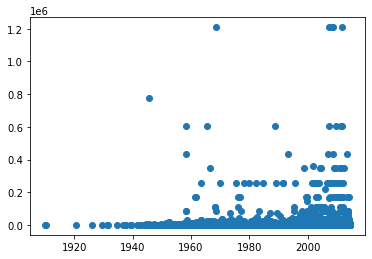

In [44]:
#volvemos a graficar
plt.scatter(data_out.iloc[:,0],data_out.iloc[:,5])

Con eso se muestra que tenemos una base mejor para presentar algun modelo. En este caso buscaremos un clasificador para country en base a las demas variables.

In [76]:
#Primero creamos un dataframe auxiliar
data_float2 = data_out[["country", "duration (seconds)", "latitude", "longitude "]]

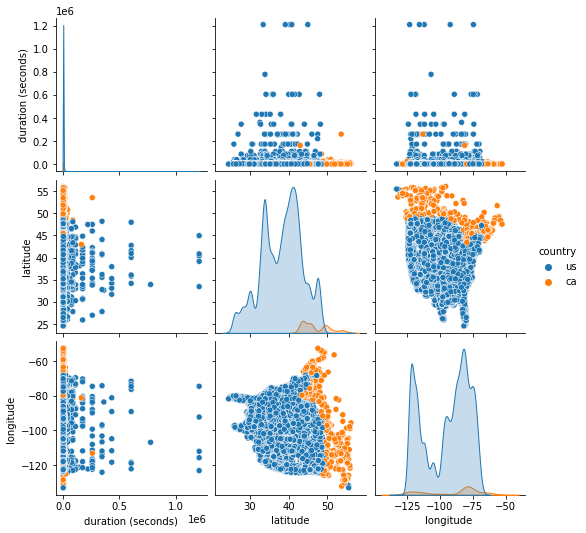

In [77]:
sn.pairplot(data_float2, hue='country')
plt.show()

Los que parecen clasificar mejor al grupo son latitude y longitude, así las usaremos para el modelo.

In [89]:
from sklearn import neighbors
from sklearn import preprocessing
classifier=neighbors.KNeighborsClassifier(n_neighbors=5)

In [91]:
#primero lo volvemos una variable categorica
data_out.iloc[:,3] = data_out.iloc[:,3].astype("category")

C:\Users\JOSEPH\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [92]:
#Lo renombramos con un vector de 0 y 1 ya que solo hay 2 categorias
country = data_out["country"].cat.rename_categories([0, 1])

In [99]:
#normalizamos la base de datos
train = data_out[["latitude", "longitude "]]
d = preprocessing.normalize(train)
train_escalado = pd.DataFrame(d)

In [100]:
#hacemos el entrenamiento del modelo de clasificacion
classifier.fit(train_escalado,country)

KNeighborsClassifier()

In [120]:
#se usa la base para hacer una prediccion 
predictions=classifier.predict(train)

In [115]:
#Usamos un calificador para las predicciones y los verdaderos valores de la base
from sklearn.metrics import accuracy_score
accuracy_score(country,predictions)

0.9916936206399101


Lo que dice es que para la base de entrenamiento es buena para predecir los valores verdaderos. Ahora graficaremos el graficamos al clasificador con los puntos a clasificar.

In [133]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = .02
# calculate min, max and limits
x_min, x_max = train_escalado[0].min() - 1, train_escalado[0].max() + 1
y_min, y_max = train_escalado[1].min() - 1, train_escalado[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [134]:
classifier.fit(train_escalado,country)

KNeighborsClassifier()

In [135]:
# Clase de clasificadores con k vecinos
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-142-3904f4e8e4c0>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


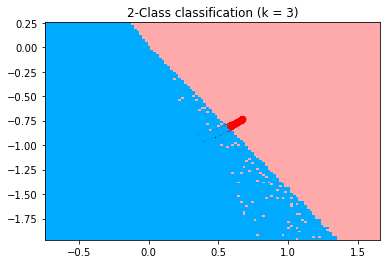

In [142]:
# Se pone la grafica de color 
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
n_neighbors = 3
# Graficamos algunos puntos de la base
plt.scatter(train_escalado[0], train_escalado[1], c=country, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.show()

Los puntos en rojo son los que no se clasificaron correctamente, así que nnuestro clasificiador es bueno.
Las conclusones son que la latitud y longitus son un clasificador para la categoría country, a la variable
se le podria acoplar un modelo lineal que se acople a los puntos pero no lo veo optimo en el sentido de que
no hay patron o tendencia que sea mejor considerar para crear tal modelo.